In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
covid = pd.read_csv('https://opendata.ecdc.europa.eu/covid19/casedistribution/csv')

In [3]:
covid

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,23/06/2020,23,6,2020,310,17,Afghanistan,AF,AFG,38041757.0,Asia
1,22/06/2020,22,6,2020,409,12,Afghanistan,AF,AFG,38041757.0,Asia
2,21/06/2020,21,6,2020,546,21,Afghanistan,AF,AFG,38041757.0,Asia
3,20/06/2020,20,6,2020,346,2,Afghanistan,AF,AFG,38041757.0,Asia
4,19/06/2020,19,6,2020,658,42,Afghanistan,AF,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...
25303,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
25304,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa
25305,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa
25306,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa


In [4]:
covid.to_csv('covid_data.csv')

In [5]:
covid.drop("countryterritoryCode",axis=1,inplace=True)
covid.drop("day",axis=1,inplace=True)
covid.drop("month",axis=1,inplace=True)
covid.drop("year",axis=1,inplace=True)

In [6]:
covid.drop("geoId",axis=1,inplace=True)
covid

,dateRep,cases,deaths,countriesAndTerritories,popData2019,continentExp
0,23/06/2020,310,17,Afghanistan,38041757.0,Asia
1,22/06/2020,409,12,Afghanistan,38041757.0,Asia
2,21/06/2020,546,21,Afghanistan,38041757.0,Asia
3,20/06/2020,346,2,Afghanistan,38041757.0,Asia
4,19/06/2020,658,42,Afghanistan,38041757.0,Asia
...,...,...,...,...,...,...
25303,25/03/2020,0,0,Zimbabwe,14645473.0,Africa
25304,24/03/2020,0,1,Zimbabwe,14645473.0,Africa
25305,23/03/2020,0,0,Zimbabwe,14645473.0,Africa
25306,22/03/2020,1,0,Zimbabwe,14645473.0,Africa


In [7]:
covid.rename(columns={'dateRep':'date','countriesAndTerritories':'country', 'continentExp':'continent', 'popData2018':'population-18'}, inplace=True)

In [8]:
covid

,date,cases,deaths,country,popData2019,continent
0,23/06/2020,310,17,Afghanistan,38041757.0,Asia
1,22/06/2020,409,12,Afghanistan,38041757.0,Asia
2,21/06/2020,546,21,Afghanistan,38041757.0,Asia
3,20/06/2020,346,2,Afghanistan,38041757.0,Asia
4,19/06/2020,658,42,Afghanistan,38041757.0,Asia
...,...,...,...,...,...,...
25303,25/03/2020,0,0,Zimbabwe,14645473.0,Africa
25304,24/03/2020,0,1,Zimbabwe,14645473.0,Africa
25305,23/03/2020,0,0,Zimbabwe,14645473.0,Africa
25306,22/03/2020,1,0,Zimbabwe,14645473.0,Africa


In [9]:
covid1 = covid.iloc[::-1]
covid1

,date,cases,deaths,country,popData2019,continent
25307,21/03/2020,1,0,Zimbabwe,14645473.0,Africa
25306,22/03/2020,1,0,Zimbabwe,14645473.0,Africa
25305,23/03/2020,0,0,Zimbabwe,14645473.0,Africa
25304,24/03/2020,0,1,Zimbabwe,14645473.0,Africa
25303,25/03/2020,0,0,Zimbabwe,14645473.0,Africa
...,...,...,...,...,...,...
4,19/06/2020,658,42,Afghanistan,38041757.0,Asia
3,20/06/2020,346,2,Afghanistan,38041757.0,Asia
2,21/06/2020,546,21,Afghanistan,38041757.0,Asia
1,22/06/2020,409,12,Afghanistan,38041757.0,Asia


In [10]:
covid1.head()

,date,cases,deaths,country,popData2019,continent
25307,21/03/2020,1,0,Zimbabwe,14645473.0,Africa
25306,22/03/2020,1,0,Zimbabwe,14645473.0,Africa
25305,23/03/2020,0,0,Zimbabwe,14645473.0,Africa
25304,24/03/2020,0,1,Zimbabwe,14645473.0,Africa
25303,25/03/2020,0,0,Zimbabwe,14645473.0,Africa


In [11]:
India = covid1[covid1["country"]=="India"]
India

,date,cases,deaths,country,popData2019,continent
11071,31/12/2019,0,0,India,1.366418e+09,Asia
11070,01/01/2020,0,0,India,1.366418e+09,Asia
11069,02/01/2020,0,0,India,1.366418e+09,Asia
11068,03/01/2020,0,0,India,1.366418e+09,Asia
11067,04/01/2020,0,0,India,1.366418e+09,Asia
...,...,...,...,...,...,...
10901,19/06/2020,13586,336,India,1.366418e+09,Asia
10900,20/06/2020,14516,375,India,1.366418e+09,Asia
10899,21/06/2020,15413,306,India,1.366418e+09,Asia
10898,22/06/2020,14821,445,India,1.366418e+09,Asia


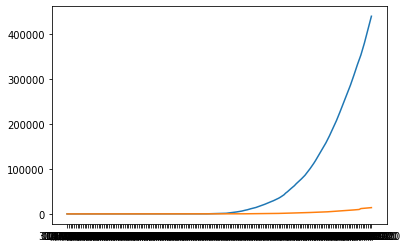

In [12]:
plt.plot(India["date"],India["cases"].cumsum())
plt.plot(India["date"],India["deaths"].cumsum())

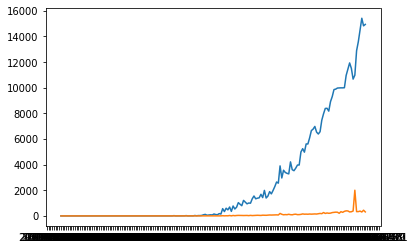

In [13]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"]
z_values = India["deaths"]
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)

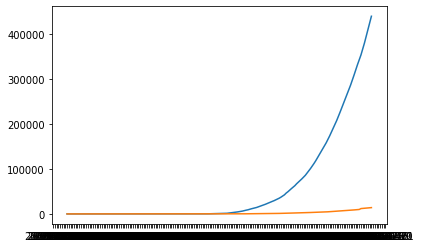

In [14]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"].cumsum()
z_values = India["deaths"].cumsum()
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)

In [15]:
India

,date,cases,deaths,country,popData2019,continent
11071,31/12/2019,0,0,India,1.366418e+09,Asia
11070,01/01/2020,0,0,India,1.366418e+09,Asia
11069,02/01/2020,0,0,India,1.366418e+09,Asia
11068,03/01/2020,0,0,India,1.366418e+09,Asia
11067,04/01/2020,0,0,India,1.366418e+09,Asia
...,...,...,...,...,...,...
10901,19/06/2020,13586,336,India,1.366418e+09,Asia
10900,20/06/2020,14516,375,India,1.366418e+09,Asia
10899,21/06/2020,15413,306,India,1.366418e+09,Asia
10898,22/06/2020,14821,445,India,1.366418e+09,Asia


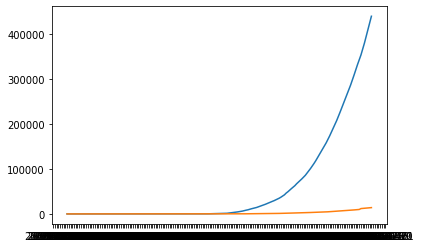

In [16]:
import datetime
import matplotlib.dates as mdates
#dates = ["01/02/2020", "01/03/2020", "01/04/2020"]
y_values = India["cases"].cumsum()
z_values = India["deaths"].cumsum()
x_values = [datetime.datetime.strptime(d,"%d/%m/%Y").date() for d in India["date"]]
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
plt.plot(x_values, y_values)
plt.plot(x_values, z_values)

In [17]:
country_wise = covid1.groupby(["country"]).sum()
country_wise

,cases,deaths,popData2019
country,,,
Afghanistan,29143,598,6.314932e+09
Albania,1995,44,3.082577e+08
Algeria,11920,852,7.362072e+09
Andorra,855,52,7.868892e+06
Angola,183,9,2.991578e+09
...,...,...,...
Vietnam,349,0,1.659148e+10
Western_Sahara,25,1,3.347672e+07
Yemen,967,257,2.187144e+09


In [18]:
country_wise["population-18"]=country_wise["population-18"]//153
country_wise

KeyError: 'population-18'

In [19]:
k=country_wise.nlargest(10, ['cases']) 
k

,cases,deaths,popData2019
country,,,
United_States_of_America,2312302,120402,5.791543e+10
Brazil,1106470,51271,3.714472e+10
Russia,592280,8206,2.016735e+10
India,440215,14011,2.391231e+11
United_Kingdom,305289,42647,1.172989e+10
Peru,254936,8045,3.511130e+09
Chile,246963,4502,2.103676e+09
Spain,246504,28324,8.213986e+09
Italy,238720,34657,1.062328e+10


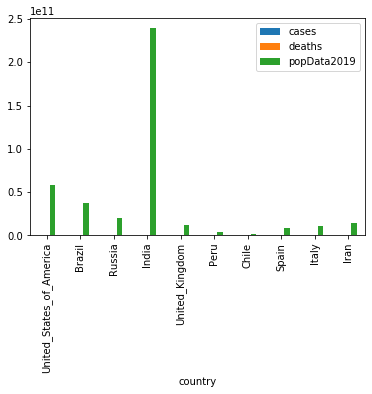

In [20]:
k.plot.bar()

In [21]:
k.iloc[2]

cases          5.922800e+05
deaths         8.206000e+03
popData2019    2.016735e+10
Name: Russia, dtype: float64

In [22]:
l=country_wise.nlargest(10, ['deaths'])
l

,cases,deaths,popData2019
country,,,
United_States_of_America,2312302,120402,5.791543e+10
Brazil,1106470,51271,3.714472e+10
United_Kingdom,305289,42647,1.172989e+10
Italy,238720,34657,1.062328e+10
France,160750,29663,1.179427e+10
Spain,246504,28324,8.213986e+09
Mexico,185122,22584,2.143269e+10
India,440215,14011,2.391231e+11
Iran,207525,9742,1.459285e+10


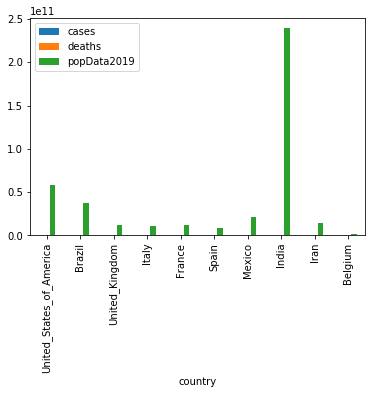

In [23]:
l.plot.bar()